# Objective: To understand the importance of scaling on PCA

In [1]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Task 0: Write the function to compute the pca using Eigenvector approach

In [82]:
from numpy.linalg import svd
import numpy.linalg as la


def pca(X):
    """PCA with eigenvector approach"""
    cov = np.cov(X, rowvar=False)
    evals, P = la.eigh(cov)
    idx = np.argsort(evals)[::-1]
    P = P[:, idx]
    evals = evals[idx]
    T = np.dot(X, P)
    Sigma = la.norm(T, axis=0)
    return T, Sigma, P # Score, Variance, Loadings


def pca_svd(X):
    """PCA with SVD approach"""
    U, S, PT = svd(X, full_matrices=False)
    Sigma = np.diag(S)
    T = np.dot(U, Sigma)
    return T, Sigma, PT.T

In [77]:
X, y = load_wine(return_X_y=True)

# Standard scaler
standard_scaling = preprocessing.StandardScaler()
X_standard = standard_scaling.fit_transform(X)

# Scaling to min and maximum values of each feature
minmax_scaling = preprocessing.MinMaxScaler()
X_minmax = minmax_scaling.fit_transform(X)

# Scaling by diving by the maximum absolute values of each feature
max_abs_scaler = preprocessing.MaxAbsScaler()
X_maxabs = max_abs_scaler.fit_transform(X)

# Three different ways of scaling
* Scaling by removing the mean and divising by the standard deviation 
        #standard_scaling=preprocessing.StandardScaler()
        #X_standard=standard_scaling.fit_transform(X)
* Scaling to min and maximum values of each feature
        #minmax_scaling=preprocessing.MinMaxScaler()
        #X_minmax=minmax_scaling.fit_transform(X)
* Scaling by diving by the maximumabsolute values of each features
        #max_abs_scaler=preprocessing.MaxAbsScaler()
        #X_maxabs=max_abs_scaler.fit_transform(X)

## Task 1: Create the scores plot without any scaling

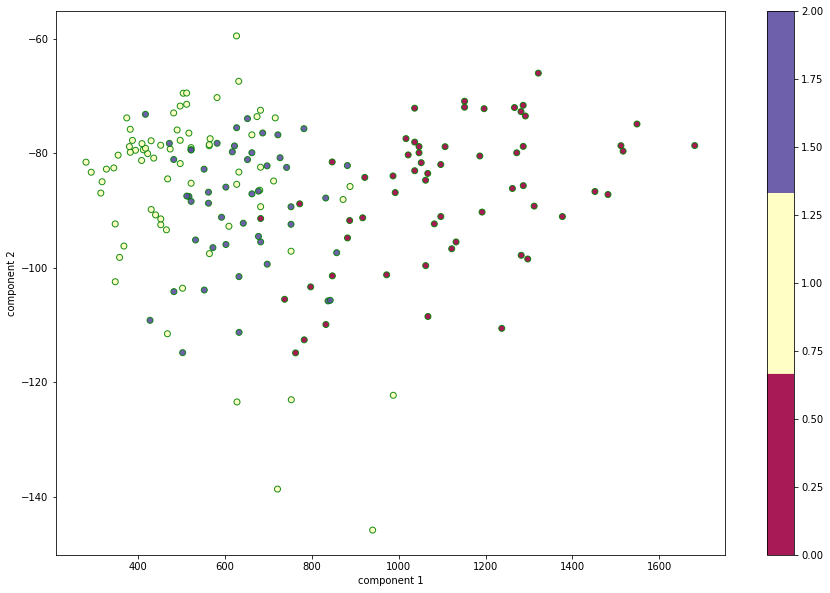

In [78]:
T, S, P = pca(X)

plt.figure(figsize=(15,10))
plt.scatter(
    T[:, 0], T[:, 1],
    c=y, edgecolor='green', alpha=0.9,
    cmap=plt.cm.get_cmap('Spectral', 3)
)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Task 2: Create the scores plot without any standard scaling  
With standard scaling?

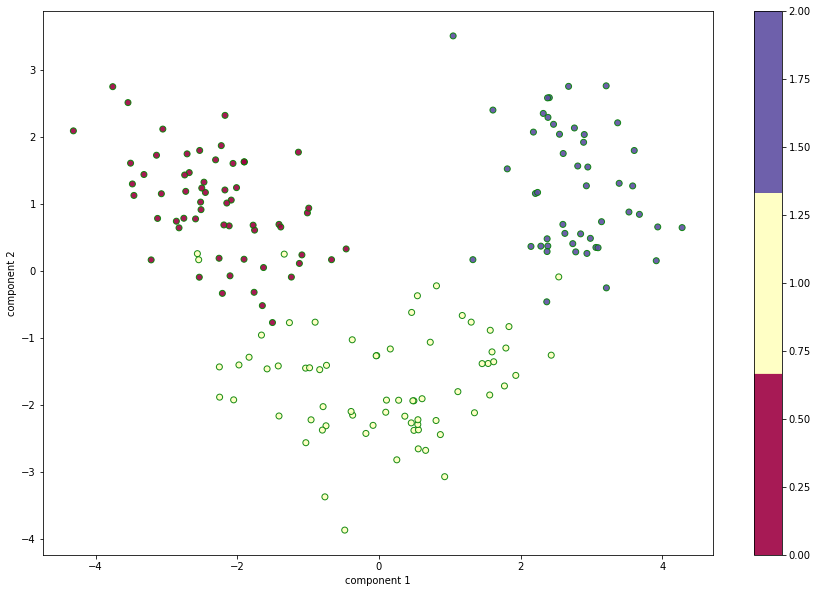

In [79]:
T, S, P = pca(X_standard)

plt.figure(figsize=(15,10))
plt.scatter(
    T[:, 0], T[:, 1],
    c=y, edgecolor='green', alpha=0.9,
    cmap=plt.cm.get_cmap('Spectral', 3)
)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Task 3: Create the scores plot without any min max scaling  
With minmax scaling?

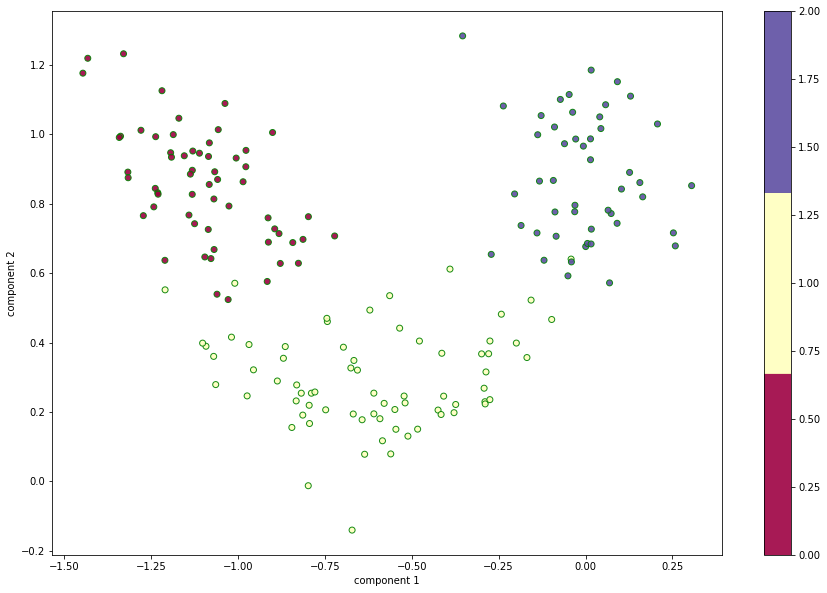

In [80]:
T, S, P = pca(X_minmax)

plt.figure(figsize=(15,10))
plt.scatter(
    T[:, 0], T[:, 1],
    c=y, edgecolor='green', alpha=0.9,
    cmap=plt.cm.get_cmap('Spectral', 3)
)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Task 4: Create the scores plot without any max abs scaling scaling  
With max abs scaling?

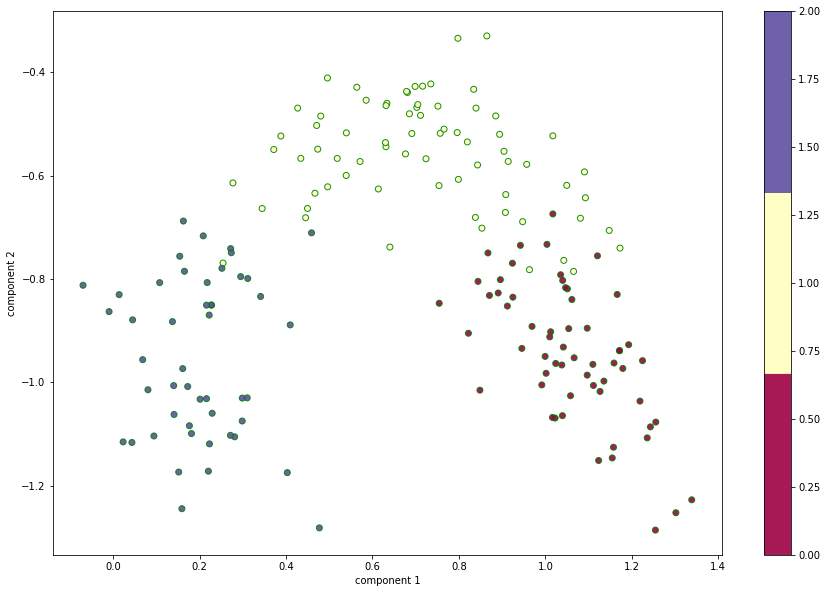

In [81]:
T, S, P = pca(X_maxabs)

plt.figure(figsize=(15,10))
plt.scatter(
    T[:, 0], T[:, 1],
    c=y, edgecolor='green', alpha=0.9,
    cmap=plt.cm.get_cmap('Spectral', 3)
)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();